In [13]:
import tensorflow as tf

In [14]:
from keras.preprocessing.image import ImageDataGenerator

## 1. Data Preprocessing

### preprocessing train data

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('pics/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 47009 images belonging to 2 classes.


### preprocessing test data

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('pics/Validation',
                                               target_size= (64,64),
                                               batch_size=32,
                                               class_mode='binary')

Found 11649 images belonging to 2 classes.


# 2. Build CNN

In [11]:
from keras.models import Sequential 
from keras.layers import Dense, Conv2D

In [10]:
cnn_model = Sequential()

2022-09-05 11:49:12.199919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
cnn_model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn_model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [16]:
cnn_model.add(tf.keras.layers.Flatten())

In [18]:
cnn_model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [19]:
cnn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [20]:
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
cnn_model.fit(x = training_set, validation_data = testing_set, epochs = 25)

Epoch 1/25
1470/1470 [==============================] - 271s 184ms/step - loss: 0.2734 - accuracy: 0.8866 - val_loss: 0.1509 - val_accuracy: 0.9407
Epoch 2/25
1470/1470 [==============================] - 336s 228ms/step - loss: 0.1705 - accuracy: 0.9362 - val_loss: 0.1269 - val_accuracy: 0.9519
Epoch 3/25
1470/1470 [==============================] - 348s 237ms/step - loss: 0.1473 - accuracy: 0.9463 - val_loss: 0.1366 - val_accuracy: 0.9496
Epoch 4/25
1470/1470 [==============================] - 268s 182ms/step - loss: 0.1368 - accuracy: 0.9509 - val_loss: 0.1003 - val_accuracy: 0.9649
Epoch 5/25
1470/1470 [==============================] - 266s 181ms/step - loss: 0.1274 - accuracy: 0.9533 - val_loss: 0.1039 - val_accuracy: 0.9631
Epoch 6/25
1470/1470 [==============================] - 262s 178ms/step - loss: 0.1234 - accuracy: 0.9560 - val_loss: 0.1044 - val_accuracy: 0.9607
Epoch 7/25
1470/1470 [==============================] - 7647s 5s/step - loss: 0.1167 - accuracy: 0.9586 - val_lo

# 3. Make Single Prediction

In [62]:
import numpy as np
from keras.preprocessing import image
from keras import utils
test_image = utils.load_img('single prediction/2.jpg', target_size = (64, 64),grayscale=False,color_mode='rgb',interpolation='nearest',keep_aspect_ratio=False)
test_image = utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'male'
else:
  prediction = 'female'

1/1 [==============================] - 0s 57ms/step


In [63]:
print(prediction)

female


# 4. Save CNN Model

In [6]:
import pickle

In [7]:
cnn_gender_classification_model = 'cnn_gender_classification_model.sav'
pickle.dump(cnn_model, open(cnn_gender_classification_model, 'wb'))

NameError: name 'cnn_model' is not defined

# 5. Load model using this 

In [8]:
# load the model from disk
cnn_model = pickle.load(open(cnn_gender_classification_model, 'rb'))

2022-09-05 20:57:30.586739: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 6. Try some characters' face in Breaking Bad

### Walter White

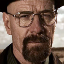

In [28]:
utils.load_img('single predict pic/Walter White.jpg', target_size = (64, 64),grayscale=False,color_mode='rgb',interpolation='nearest',keep_aspect_ratio=False)

In [29]:
import numpy as np
from keras.preprocessing import image
from keras import utils
test_image = utils.load_img('single predict pic/Walter White.jpg', target_size = (64, 64),grayscale=False,color_mode='rgb',interpolation='nearest',keep_aspect_ratio=False)
test_image = utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'male'
else:
  prediction = 'female'

1/1 [==============================] - 0s 15ms/step


In [30]:
print(prediction)

male


### Skyler White

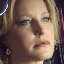

In [31]:
utils.load_img('single predict pic/Skyler White.jpg', target_size = (64, 64),grayscale=False,color_mode='rgb',interpolation='nearest',keep_aspect_ratio=False)

In [32]:
import numpy as np
from keras.preprocessing import image
from keras import utils
test_image = utils.load_img('single predict pic/Skyler White.jpg', target_size = (64, 64),grayscale=False,color_mode='rgb',interpolation='nearest',keep_aspect_ratio=False)
test_image = utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'male'
else:
  prediction = 'female'

1/1 [==============================] - 0s 18ms/step


In [33]:
print(prediction)

female


### Pinkman

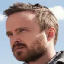

In [34]:
utils.load_img('single predict pic/Pinkman.jpg', target_size = (64, 64),grayscale=False,color_mode='rgb',interpolation='nearest',keep_aspect_ratio=False)

In [36]:
import numpy as np
from keras.preprocessing import image
from keras import utils
test_image = utils.load_img('single predict pic/Pinkman.jpg', target_size = (64, 64),grayscale=False,color_mode='rgb',interpolation='nearest',keep_aspect_ratio=False)
test_image = utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'male'
else:
  prediction = 'female'

1/1 [==============================] - 0s 15ms/step


In [37]:
print(prediction)

male
